In [1]:
#importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tabulate import tabulate
import sys

#### *Importing the datasets*

In [2]:
names = pd.read_csv('name.basics.tsv.gz', compression='gzip', sep = '\t')

In [3]:
names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0031983,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0037382,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050976,tt0050986,tt0083922"


In [4]:
names.shape

(11330662, 6)

In [5]:
title_basics = pd.read_csv('title.basics.tsv.gz', compression='gzip', sep = '\t', low_memory=False)

In [6]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
title_basics.shape

(8343380, 9)

In [8]:
title_crew = pd.read_csv('title.crew.tsv.gz', compression='gzip', sep = '\t', low_memory=False)

In [9]:
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [10]:
title_ratings = pd.read_csv('title.ratings.tsv.gz', compression='gzip', sep = '\t', low_memory=False)

In [11]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1828
1,tt0000002,6.0,236
2,tt0000003,6.5,1589
3,tt0000004,6.0,153
4,tt0000005,6.2,2405


In [12]:
len(title_ratings)

1197403

#### Making a weighted ratings sysytem to account for the number of votes as well

In [13]:
R = title_ratings['averageRating'].mean()
R

6.922857968452857

In [14]:
C = title_ratings['numVotes'].mean()
C

977.9986270286612

In [15]:
m = title_ratings['numVotes'].quantile(.90)
m

426.80000000004657

In [16]:
def weighted_average (movie, m=m, C=C):
    r = movie['averageRating']
    v = movie['numVotes']
    
    return (((v/(v+m)) * r) + ((m/(m+v)) * C))

#title_ratings['score'] = title_ratings.apply(weighted_average, axis=1)

#### *Merging the movie specific datasets based on the tconst column*

In [17]:
full_df = title_basics.merge(title_ratings, on = 'tconst')

In [18]:
full_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1828
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,236
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1589
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.0,153
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2405


In [19]:
full_df = full_df.merge(title_crew, on = 'tconst')

In [20]:
full_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1828,nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,236,nm0721526,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1589,nm0721526,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.0,153,nm0721526,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2405,nm0005690,\N


In [21]:
full_df = full_df[(full_df['numVotes']) >= m]

In [22]:
full_df['score'] = full_df.apply(weighted_average, axis=1)

In [23]:
full_df.shape

(119741, 14)

In [24]:
full_df.titleType.value_counts()

movie           55884
tvEpisode       38640
tvSeries        10178
tvMovie          4571
short            3361
video            2675
tvMiniSeries     1996
videoGame        1554
tvSpecial         708
tvShort           174
Name: titleType, dtype: int64

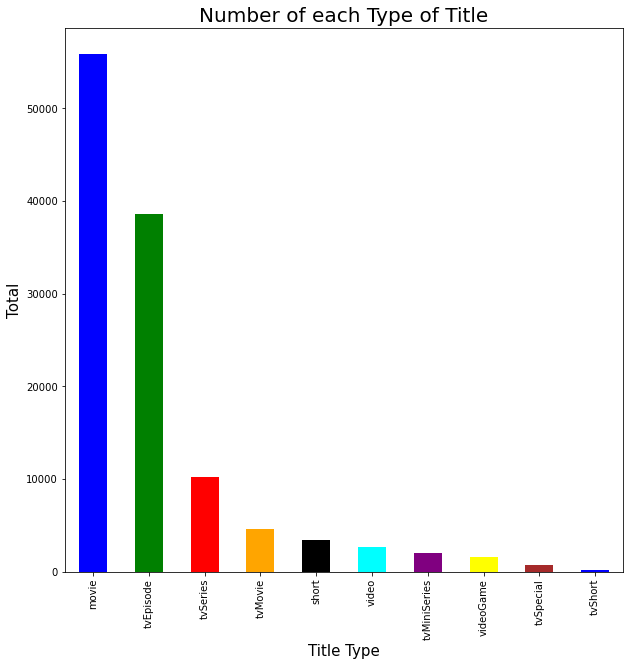

In [25]:
plt.rcParams['figure.figsize'] = (10,10)
full_df['titleType'].value_counts().plot(kind='bar', color = ['blue', 'green', 'red', 'orange',
                                                              'black', 'cyan', 'purple', 'yellow', 'brown', 'blue'])
plt.title('Number of each Type of Title', fontsize = 20)
plt.xlabel('Title Type', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

In [26]:
len(full_df)

119741

In [27]:
#subsetting dataset to only movies, tvmovies and tvseries
full_df_movie = full_df[(full_df['titleType'] == 'movie') | (full_df['titleType'] == 'tvMovie') | (full_df['titleType'] == 'tvSeries')]

In [28]:
full_df_movie.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,score
994,tt0002101,movie,Cleopatra,Cleopatra,0,1912,\N,100,"Drama,History",5.1,521,nm0309130,"nm0765026,nm0309130",443.202062
1002,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,2693,"nm0078205,nm0209738,nm0655824",nm0019604,139.836148
1026,tt0002199,movie,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",0,1912,\N,60,"Biography,Drama",5.8,571,nm0646058,nm0310155,421.649242
1098,tt0002423,movie,Passion,Madame DuBarry,0,1919,\N,85,"Biography,Drama,Romance",6.7,862,nm0523932,"nm0266183,nm0473134",328.356001
1195,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",7.0,2177,nm0275421,"nm0019855,nm0275421,nm0816232",166.160540


In [29]:
full_df_movie.shape

(70633, 14)

In [30]:
full_df_movie.titleType.value_counts()

movie       55884
tvSeries    10178
tvMovie      4571
Name: titleType, dtype: int64

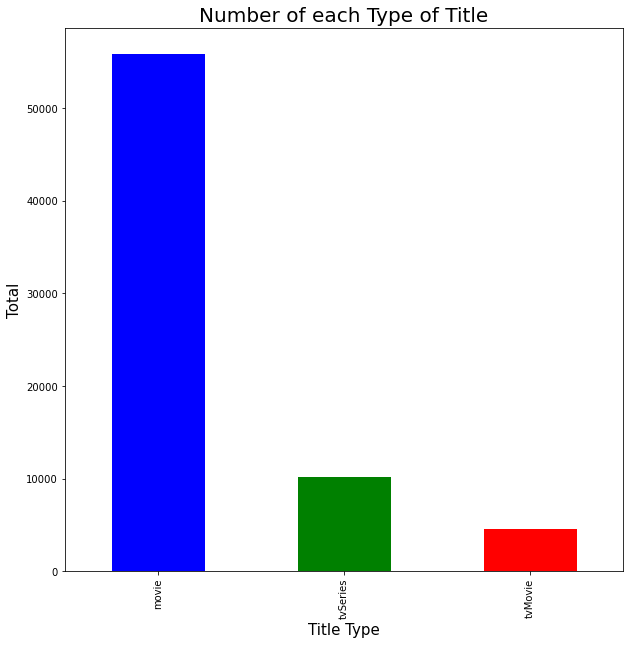

In [31]:
plt.rcParams['figure.figsize'] = (10,10)
full_df_movie['titleType'].value_counts().plot(kind='bar', color = ['blue', 'green', 'red'])
plt.title('Number of each Type of Title', fontsize = 20)
plt.xlabel('Title Type', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

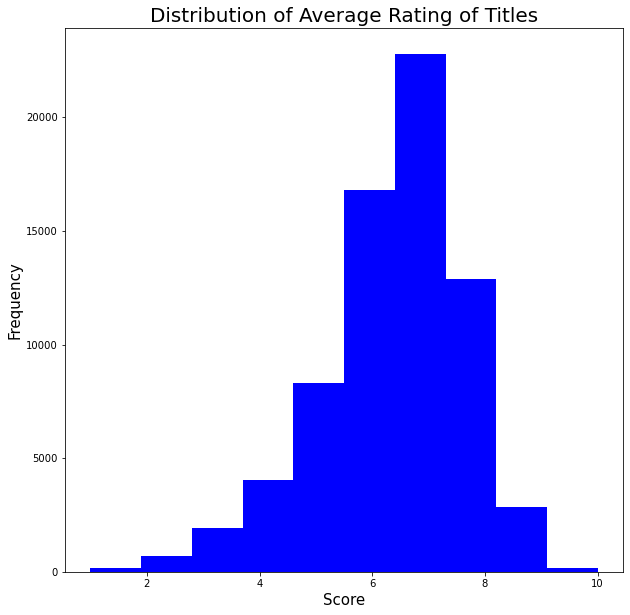

In [32]:
plt.rcParams['figure.figsize'] = (10,10)
plt.hist(full_df_movie['averageRating'], color='blue')
plt.title('Distribution of Average Rating of Titles', fontsize = 20)
plt.xlabel('Score',fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

#### *creating dictionary of names to replace in dataframe*

In [33]:
#names_code = names[['nconst','primaryName']]

In [34]:
#names[['knownfor1', 'knownfor2', 'knownfor3',
#       'knownfor4', 'knownfor5', 'knownfor6']] = names['knownForTitles'].str.split(',', expand=True)

In [35]:
#names2 = names.drop(['birthYear', 'deathYear', 'primaryProfession', 'knownForTitles'], axis=1)

In [36]:
#names2.head()

#### *dropping unecessary columns*

In [37]:
movie_data = full_df_movie.drop(['originalTitle', 'isAdult', 'endYear', 'runtimeMinutes'], axis=1)

In [38]:
movie_data = movie_data[(movie_data['titleType']== 'movie') | (movie_data['score'] >= 500)]
movie_data = movie_data.replace('\\N', np.NAN)
movie_data = movie_data.dropna()
movie_data.shape

(54141, 10)

In [39]:
movie_data2 = movie_data[(movie_data['titleType']== 'movie') | (movie_data['score'] >= 500)]
movie_data2 = movie_data2.replace('\\N', np.NAN)
movie_data = movie_data.dropna()
movie_data2.shape

(54141, 10)

#### *split the genres column*

In [40]:
movie_data2 = movie_data.assign(genres=movie_data.genres.str.split(',')).explode('genres').reset_index(drop=True)

In [41]:
movie_data2.shape

(120281, 10)

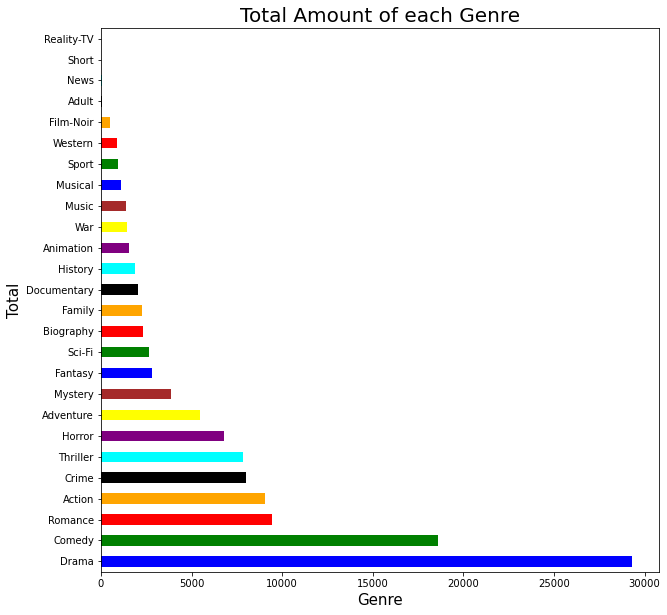

In [42]:
plt.rcParams['figure.figsize'] = (10,10)
movie_data2['genres'].value_counts().plot(kind='barh', color = ['blue', 'green', 'red', 'orange',
                                                              'black', 'cyan', 'purple', 'yellow', 'brown', 'blue', 'green', 'red', 'orange',
                                                              'black', 'cyan', 'purple', 'yellow', 'brown', 'blue', 'green', 'red', 'orange',
                                                              'black', 'cyan'] )
plt.title('Total Amount of each Genre', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

In [43]:
movie_data['startYear'].value_counts()

2018    2200
2017    2171
2019    2080
2016    2035
2015    1979
        ... 
1917      13
1915      11
1913       8
1912       2
1911       1
Name: startYear, Length: 111, dtype: int64

In [44]:
movie_data['startYear'] = movie_data['startYear'].astype(int)

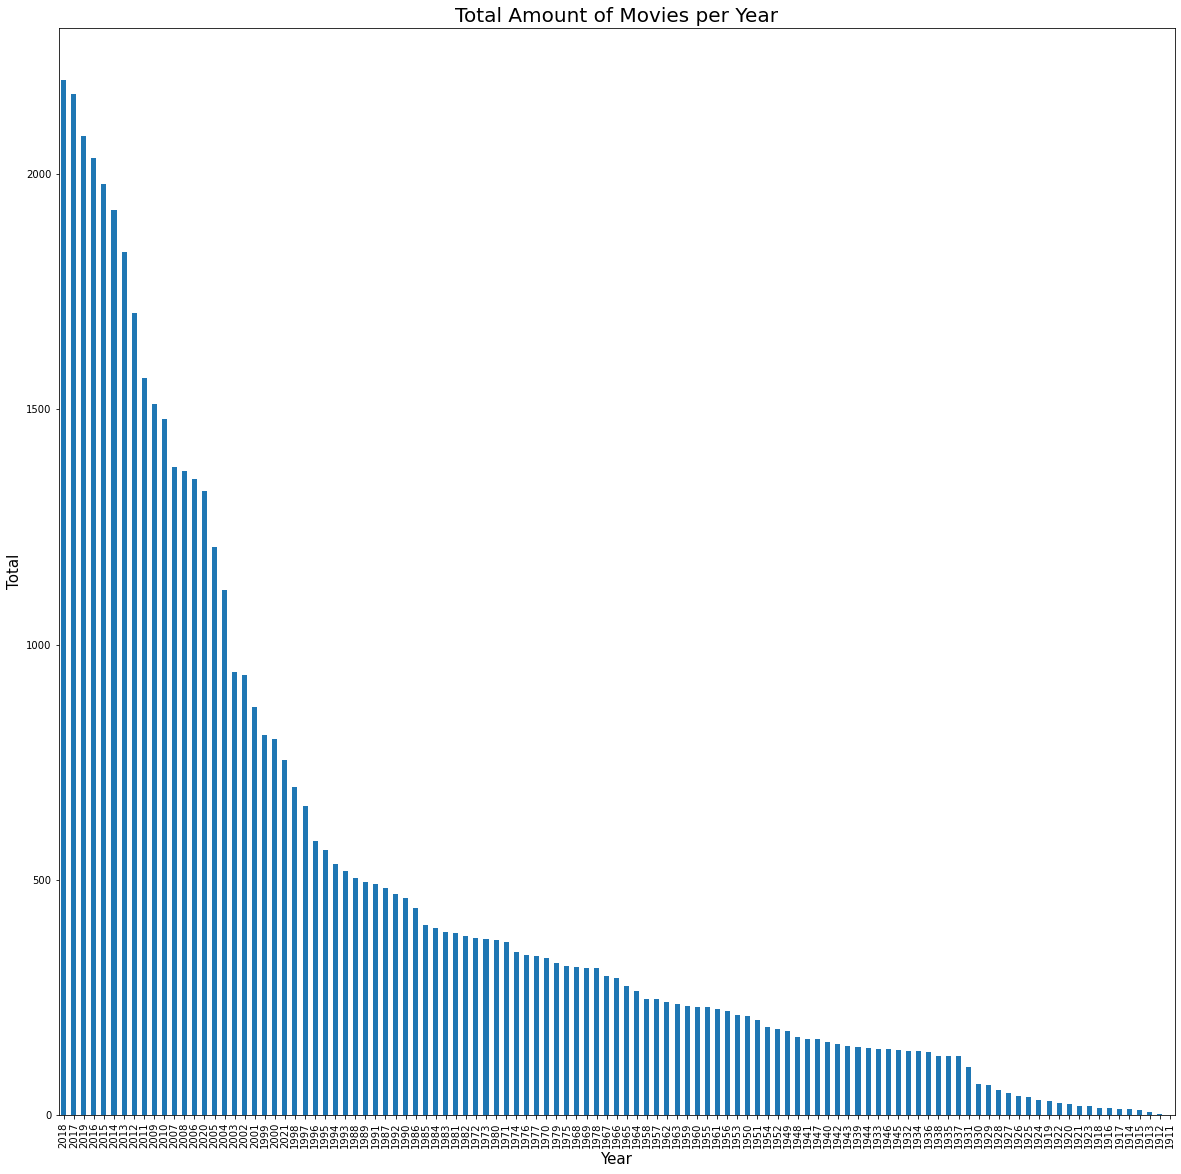

In [45]:
plt.rcParams['figure.figsize'] = (20,20)
movie_data['startYear'].value_counts().plot(kind='bar')
plt.title('Total Amount of Movies per Year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

In [46]:
genre_group = movie_data2.groupby(['genres'])['averageRating'].mean()

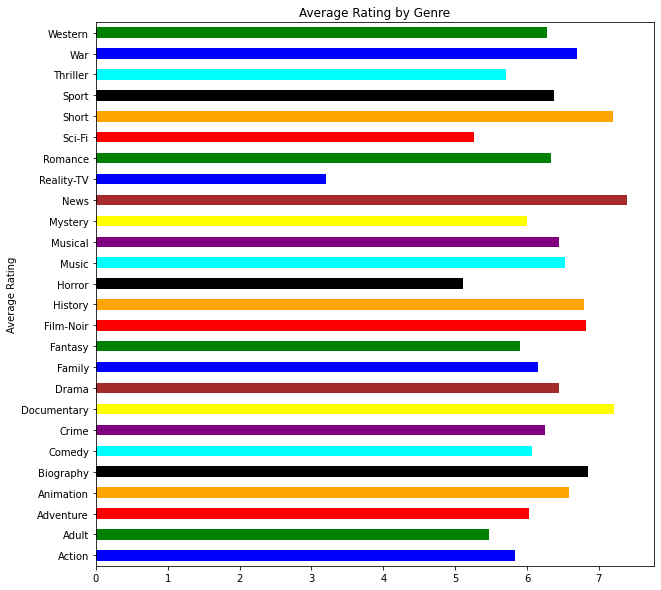

In [47]:
genre_group.plot(kind='barh', title='Average Rating by Genre', xlabel='Average Rating',
         ylabel='Genre', figsize=(10, 10),  color = ['blue', 'green', 'red', 'orange',
                                                              'black', 'cyan', 'purple', 'yellow', 'brown', 'blue', 'green', 'red', 'orange',
                                                              'black', 'cyan', 'purple', 'yellow', 'brown', 'blue', 'green', 'red', 'orange',
                                                              'black', 'cyan'] )
plt.show()

#### Building the first recommender based on the genres

In [48]:
movie_data_years = movie_data[(movie_data['startYear'] >= 2010)]
movie_data_years = movie_data_years.reset_index()
movie_data_years.shape

(21053, 11)

In [49]:
movie_data_years_top = movie_data_years.sort_values('score', ascending=False)
grouping = movie_data_years_top.groupby('genres')
grouping_drama = pd.DataFrame(grouping.get_group('Drama'))
grouping_drama = grouping_drama.sort_values('score', ascending = False)
grouping_drama.head(10)

,index,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,directors,writers,score
6206,746619,tt1977755,movie,Final Recipe,2013,Drama,6.8,427,nm1346562,"nm0398986,nm1346562",492.285563
11408,881089,tt3552960,movie,The Well,2015,Drama,7.8,428,nm1569290,nm6309606,492.218313
15568,1002867,tt5612426,movie,Centaur,2017,Drama,6.6,427,nm0008332,"nm0008331,nm0008332",492.185540
1054,492217,tt10940978,movie,Sanjhbati,2019,Drama,7.7,429,"nm10608963,nm6352729",nm6352729,491.602143
9350,829265,tt2751862,movie,Soguk,2013,Drama,5.8,428,nm0951309,nm0951309,491.216909
7790,790369,tt2298465,movie,Present Tense,2012,Drama,6.0,429,nm3537413,"nm3537413,nm5246650",490.749958
20945,1192875,tt9773532,movie,Always Say Yes,2019,Drama,6.2,430,nm0297590,nm0297590,490.284564
702,469361,tt10488396,movie,Summer Detective,2019,Drama,6.8,431,nm10767454,nm10767454,490.021700
7118,773374,tt2170327,movie,Can,2012,Drama,6.7,431,nm1628235,"nm4841006,nm1628235",489.971455
16790,1039898,tt6218440,movie,Maya Dardel,2017,Drama,5.1,430,"nm6603334,nm2549947","nm6603334,nm2549947",489.732509


In [50]:
grouping_AA = pd.DataFrame(grouping.get_group('Action,Adventure'))
grouping_AA = grouping_AA.sort_values('score', ascending = False)
grouping_AA.head(10)

,index,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,directors,writers,score
8845,815169,tt2538778,movie,Diamond Cartel,2015,"Action,Adventure",3.1,537,nm5390562,"nm4756889,nm5390562,nm5390260",434.814810
15456,999211,tt5555554,movie,Viking Legacy,2016,"Action,Adventure",2.4,584,"nm7066560,nm8001884",nm8001884,414.336579
1833,558525,tt1233259,movie,Captain Thunder,2011,"Action,Adventure",3.0,589,nm0379872,"nm0602358,nm1938616,nm0926075",412.656836
16298,1025593,tt5988966,movie,King Arthur: Excalibur Rising,2017,"Action,Adventure",2.6,708,nm2396885,"nm8001884,nm2396885",369.448902
8371,804148,tt2396200,movie,Richard The Lionheart,2013,"Action,Adventure",2.4,733,nm3375413,"nm2780927,nm3375413",361.414911
17562,1066689,tt6735754,movie,Vanamagan,2017,"Action,Adventure",5.6,765,nm1777967,nm1777967,353.829346
14096,956792,tt4827878,movie,The Rendezvous,2016,"Action,Adventure",5.1,813,"nm1691239,nm1486975","nm7429707,nm0783559",340.019450
9652,838085,tt2905768,movie,Sahasam,2013,"Action,Adventure",6.7,1060,nm1923369,"nm2379696,nm1923369",285.520456
5147,718766,tt1784670,movie,The Malay Chronicles: Bloodlines,2011,"Action,Adventure",3.7,1070,nm1126474,"nm4198784,nm1126474",281.513104
8168,799742,tt2367996,movie,Mugamoodi,2012,"Action,Adventure",5.0,1122,nm4199426,nm4199426,273.127463


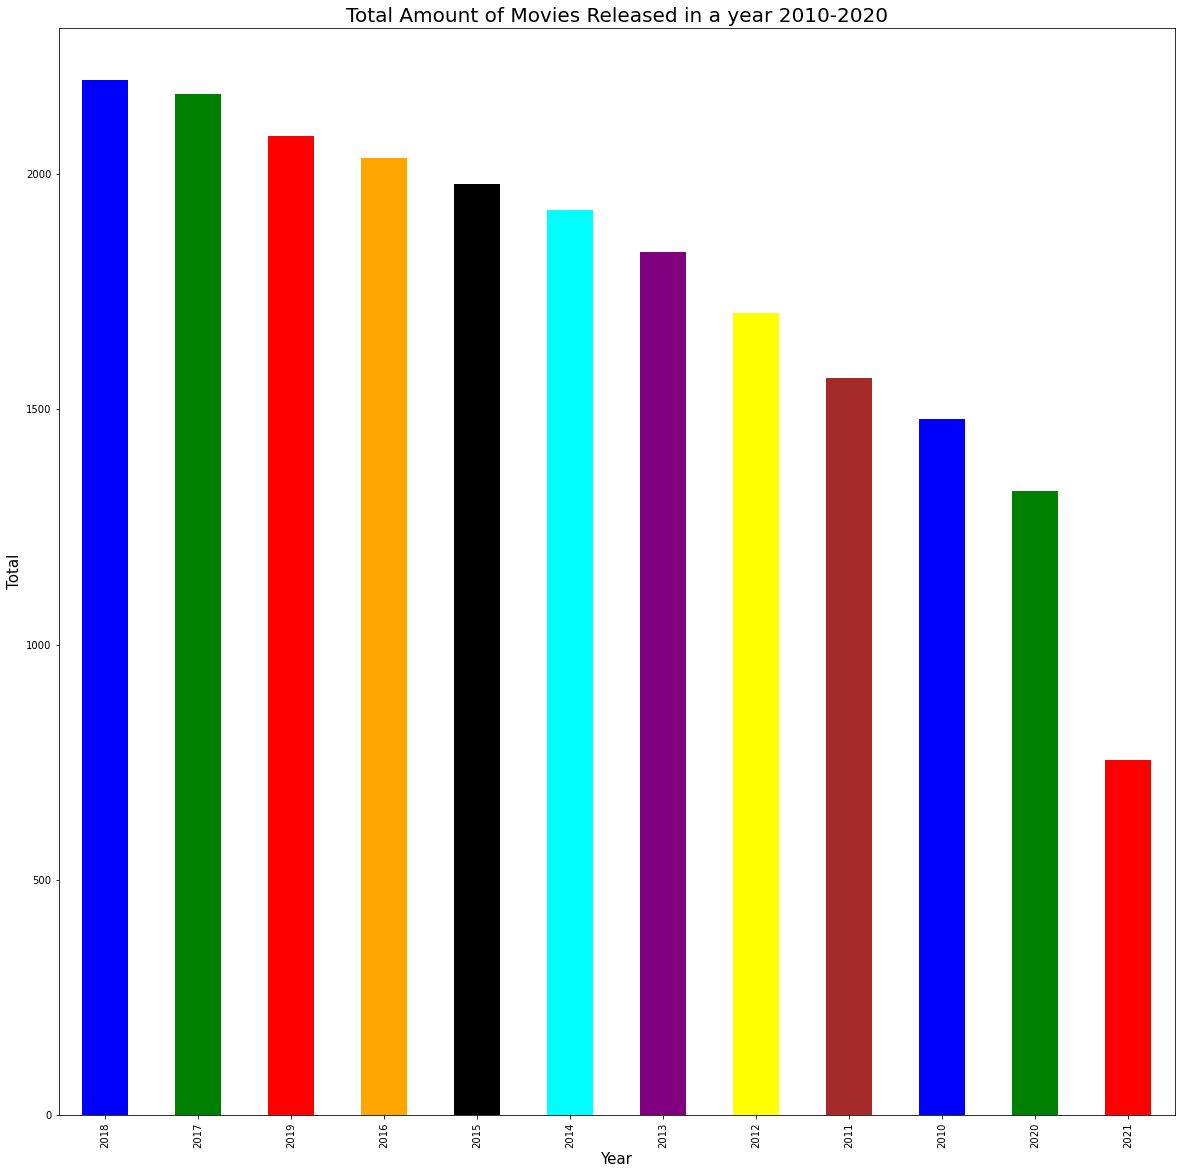

In [51]:
plt.rcParams['figure.figsize'] = (20,20)
movie_data_years['startYear'].value_counts().plot(kind='bar', color = ['blue', 'green', 'red', 'orange',
                                                              'black', 'cyan', 'purple', 'yellow', 'brown', 'blue', 'green', 'red'])
plt.title('Total Amount of Movies Released in a year 2010-2020', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

In [52]:
movie_data_years.columns

Index(['index', 'tconst', 'titleType', 'primaryTitle', 'startYear', 'genres',
       'averageRating', 'numVotes', 'directors', 'writers', 'score'],
      dtype='object')

In [53]:
movie_data_years = movie_data_years.drop(['tconst', 'titleType', 'numVotes'], axis=1)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movie_data_years['genres'])

In [55]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [56]:
titles = movie_data_years['primaryTitle']
indices = pd.Series(movie_data_years.index, index=movie_data_years['primaryTitle'])

def genre_recommendations(title):
    try:
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:21]
        movie_indices = [i[0] for i in sim_scores]
        
    except KeyError as err:
        print('{0} not found'.format(title))
    
    return titles.iloc[movie_indices]

In [57]:
genre_recommendations('Suicide Squad').head(10)

51                            Wonder Woman
75     Prince of Persia: The Sands of Time
82                     Season of the Witch
137                    Clash of the Titans
139                                   Thor
141                               Warcraft
157                    Conan the Barbarian
163                                 Priest
166                          Gallowwalkers
237                Silent Hill: Revelation
Name: primaryTitle, dtype: object

In [58]:
genre_recommendations('The Avengers').head(10)

23                             John Carter
39                     Alita: Battle Angel
58      Captain America: The First Avenger
114                           Man of Steel
168                               Godzilla
182                           The Avengers
471                         Monster Island
518                               Krrish 3
1121                          TRON: Legacy
1313                         Green Lantern
Name: primaryTitle, dtype: object

In [59]:
genre_recommendations('Coco').head(10)

22                           Tangled
38                       Toy Story 3
49                     Puss in Boots
73                        The Smurfs
86                        The Croods
108         Escape from Planet Earth
124                    The Boxtrolls
173               Hotel Transylvania
178    Hoodwinked Too! Hood vs. Evil
186                        Sir Billi
Name: primaryTitle, dtype: object

In [60]:
#movie_data2['startYear'] = movie_data2['startYear'].astype(int)
#movie_data_years = movie_data2[(movie_data2['startYear'] >= 2010)]
#movie_data_years = movie_data2_years.reset_index()
#movie_data_years.shape

#### Knn Recommender

In [61]:
#making a pivot table
movie_data_years = movie_data_years.drop_duplicates(subset='primaryTitle', keep='last')
movie_years_pivot = movie_data_years.pivot(index='primaryTitle', columns='genres', values='averageRating').fillna(0)

In [62]:
movie_years_pivot.head()

genres,Action,"Action,Adventure","Action,Adventure,Animation","Action,Adventure,Biography","Action,Adventure,Comedy","Action,Adventure,Crime","Action,Adventure,Documentary","Action,Adventure,Drama","Action,Adventure,Family","Action,Adventure,Fantasy",...,"Romance,Sport","Romance,Thriller","Romance,Western",Sci-Fi,"Sci-Fi,Thriller",Sport,Thriller,"Thriller,Western",War,Western
primaryTitle,,,,,,,,,,,,,,,,,,,,,
#Alive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Captured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Female Pleasure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Followme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#FriendsButMarried,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#Turning into a matrix for knn
from scipy.sparse import csr_matrix
movie_years_matrix = csr_matrix(movie_years_pivot.values)

In [64]:
#setting knn model
from sklearn.neighbors import NearestNeighbors

movie_knn = NearestNeighbors(metric = 'cosine', algorithm='brute')
movie_knn.fit(movie_years_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [65]:
query_index = np.random.choice(movie_years_pivot.shape[0])
distances, indices = movie_knn.kneighbors(movie_years_pivot.values[query_index, :].reshape(1,-1), n_neighbors=10)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_years_pivot.index[query_index]))
    else:
        print('{0}: {1}'.format(i, movie_years_pivot.index[indices.flatten()[i]]))

Recommendations for X-Men: Days of Future Past:

1: Revolt
2: Rampage
3: Moontrap: Target Earth
4: Solis
5: Cosmic Sin
6: Assassin's Creed
7: Power Rangers
8: Transformers: Age of Extinction
9: Oblivion


In [66]:
def get_knn_rec (movie):
    try: 
        query_index = movie_years_pivot.loc[movie]
        distances, indices = movie_knn.kneighbors(query_index.values.reshape(1,-1), n_neighbors=10)

        for i in range(0, len(distances.flatten())):
            if i == 0:
                print('Recommendations for {0}:\n'.format(movie))
            else:
                print('{0}: {1}'.format(i, movie_years_pivot.index[indices.flatten()[i]]))
    except KeyError as err:
        print('{0} not found'.format(movie))
        
    return

In [67]:
get_knn_rec('Coco')

Recommendations for Coco:

1: Ice Age: Continental Drift
2: Minuscule - Mandibles from Far Away
3: Woody Woodpecker
4: A Monster in Paris
5: Speckles: The Tarbosaurus
6: Angela's Christmas Wish
7: Shaun the Sheep Movie
8: The Wild Life
9: Oggy and the Cockroaches: The Movie


In [68]:
get_knn_rec('Suicide Squad')

Recommendations for Suicide Squad:

1: Fullmetal Alchemist
2: Troy the Odyssey
3: Doctor Strange
4: The 25th Reich
5: Survivor
6: Hellboy
7: Bleach
8: The Mortal Instruments: City of Bones
9: Gods of Egypt


In [69]:
get_knn_rec('The Avengers')

Recommendations for The Avengers:

1: Revolt
2: Rampage
3: Moontrap: Target Earth
4: Solis
5: Cosmic Sin
6: Assassin's Creed
7: Power Rangers
8: Transformers: Age of Extinction
9: Oblivion


In [70]:
get_knn_rec('Matrix')

Matrix not found


#### Knn recommender with full movie dataframe

In [71]:
full_df_movie2 = full_df_movie.reset_index()
full_df_movie2 = full_df_movie2.drop_duplicates(subset='primaryTitle', keep='last')

In [72]:
full_df_movie2_pivot = full_df_movie2.pivot(index='primaryTitle', columns='genres', values='averageRating').fillna(0)

In [73]:
full_df_movie2.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,score
2,1026,tt0002199,movie,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",0,1912,\N,60,"Biography,Drama",5.8,571,nm0646058,nm0310155,421.649242
4,1195,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",7.0,2177,nm0275421,"nm0019855,nm0275421,nm0816232",166.160540
5,1225,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1156,nm0803705,"nm0472236,nm0803705",268.828541
6,1230,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",7.0,1504,nm0275421,"nm0019855,nm0275421,nm0816232",221.637567
7,1251,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",7.0,1176,nm0275421,"nm0019855,nm0275421,nm0816232",265.561401


In [74]:
full_df_movie_matrix = csr_matrix(full_df_movie2_pivot.values)

In [75]:
full_df_knn = NearestNeighbors(metric = 'cosine', algorithm='brute')
full_df_knn.fit(full_df_movie_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [76]:
def get_knn_rec2 (movie):
    try: 
        query_index = full_df_movie2_pivot.loc[movie]
        distances, indices = full_df_knn.kneighbors(query_index.values.reshape(1,-1), n_neighbors=10)

        for i in range(0, len(distances.flatten())):
            if i == 0:
                print('Recommendations for {0}:\n'.format(movie))
            else:
                print('{0}: {1}'.format(i, full_df_movie2_pivot.index[indices.flatten()[i]]))
    except KeyError as err:
        print('{0} not found'.format(movie))
        
    return

In [77]:
get_knn_rec2('Coco')

Recommendations for Coco:

1: The Lion Guard: Return of the Roar
2: Woody Woodpecker
3: The Littl' Bits
4: HarmonQuest
5: The Twisted Tales of Felix the Cat
6: Mune: Guardian of the Moon
7: Muppet Babies
8: Marsupilami
9: Spirit Untamed


In [78]:
get_knn_rec2('The Matrix')

Recommendations for The Matrix:

1: Rz-9
2: Programmed to Kill
3: Prototype
4: Murdercycle
5: Campus Code
6: The Princess Blade
7: The Wolverine
8: Hulk
9: World Gone Wild


In [79]:
get_knn_rec2('The Sound of Music')

Recommendations for The Sound of Music:

1: Right on Track
2: Finding Neverland
3: Beautiful
4: A Street Cat Named Bob
5: The von Trapp Family: A Life of Music
6: A Man Called Peter
7: Thérèse: The Story of Saint Thérèse of Lisieux
8: Oshin
9: Empire of Silver
